# 1.Introduction:

This is a basic exploration of the Yelp reviews dataset.

Yelp is a local-search service powered by crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

Yelp was founded in 2004 by former PayPal employees. By 2010 it had $30 million in revenues and the website had published more than 4.5 million crowd-sourced reviews.

The data here is a rich variety of the ratings,comments and metadata of businesses. Lets start!

In [1]:
#listdir
import os
print(os.listdir("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset"))

['yelp_business.csv', 'yelp_business_attributes.csv', 'yelp_business_hours.csv', 'yelp_checkin.csv', 'yelp_review.csv', 'yelp_tip.csv', 'yelp_user.csv']


# 2. Imports:

In [2]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

%matplotlib inline

In [3]:
#importing every dataset
business=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_business.csv")
business_attributes=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_business_attributes.csv")
business_hours=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_business_hours.csv")
check_in=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_checkin.csv")
reviews=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_review.csv")
tip=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_tip.csv")
user=pd.read_csv("C:/Users/Yousuf Khan/data/yelp_dataset_challenge_academic_dataset/yelp_user.csv")
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 865.1507019996643 s


In [4]:
#head
business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [5]:
business.shape

(174567, 13)

In [6]:
reviews.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [7]:
reviews.shape

(5261668, 9)

# 3. Ratings distribution:

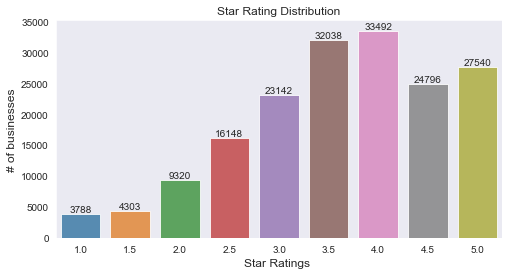

In [8]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

There are  59106  different types/categories of Businesses in Yelp!


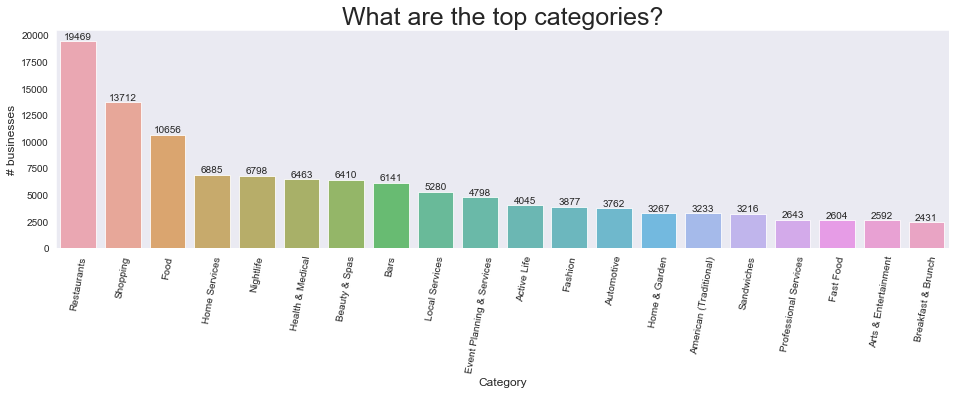

In [9]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# 4.Mapping Section:
## Where are the reviews from?

Here in this mapping section, we try to analyze the locations of the various businesses.

1. First we look into the Global view of Yelp businesses
2. Then we zoom into the two most concentrated regions (North America, Eurozone)
3. Explore the cities with the most businesses reviewed
4. Vizualize the top 2 cities

## 4.1 World view:


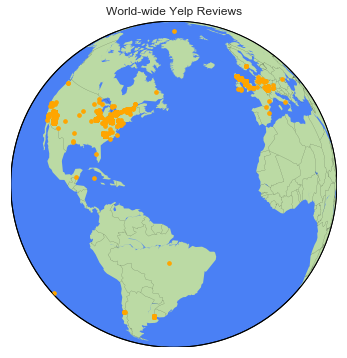

In [10]:
#basic basemap of the world
plt.figure(1, figsize=(15,6))
# use ortho projection for the globe type version
m1=Basemap(projection='ortho',lat_0=20,lon_0=-50)

# hex codes from google maps color pallete = http://www.color-hex.com/color-palette/9261
#add continents
m1.fillcontinents(color='#bbdaa4',lake_color='#4a80f5') 
# add the oceans
m1.drawmapboundary(fill_color='#4a80f5')                
# Draw the boundaries of the countires
m1.drawcountries(linewidth=0.1, color="black")

#Add the scatter points to indicate the locations of the businesses
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="orange", lw=3, alpha=1, zorder=5)
plt.title("World-wide Yelp Reviews")
plt.show()

## 4.2 NA and Europe region:

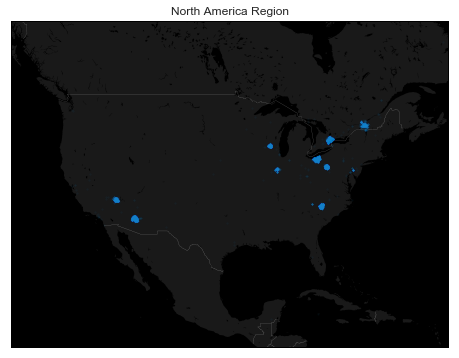

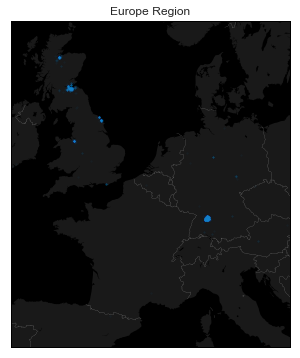

In [11]:
# Sample it down to only the North America region 
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
NA_business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")
# Sample it down to only the Eurozone + Britain :p 
lon_min, lon_max = -8.613281,16.699219
lat_min, lat_max = 40.488737,59.204064

#create the selector
idx_euro = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)
#apply the selector to subset
euro_business=business[idx_euro]

#initiate the figure
plt.figure(figsize=(12,6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("Europe Region")
plt.show()

## 4.3 City view:
Here, lets first check which cities have the most businesses reviewed by Yelp.

* Then, we look into how 4 cities(Las Vegas, Pheonix,Stuttgart,Edinburgh)  look by plotting the lat-long of the businesses in them.


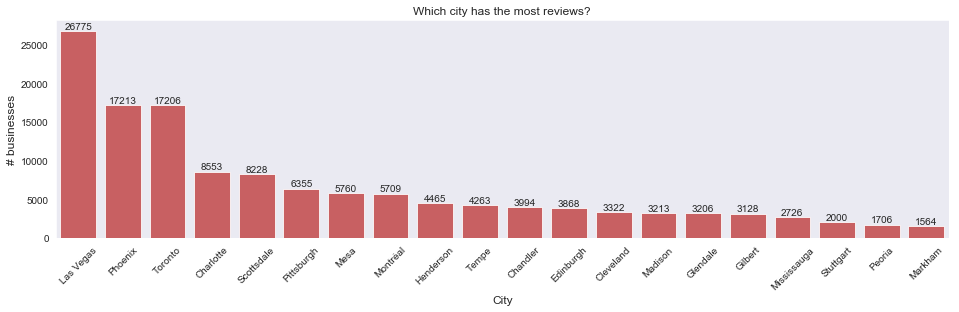

In [12]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [13]:
#get all ratings data
rating_data=business[['latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

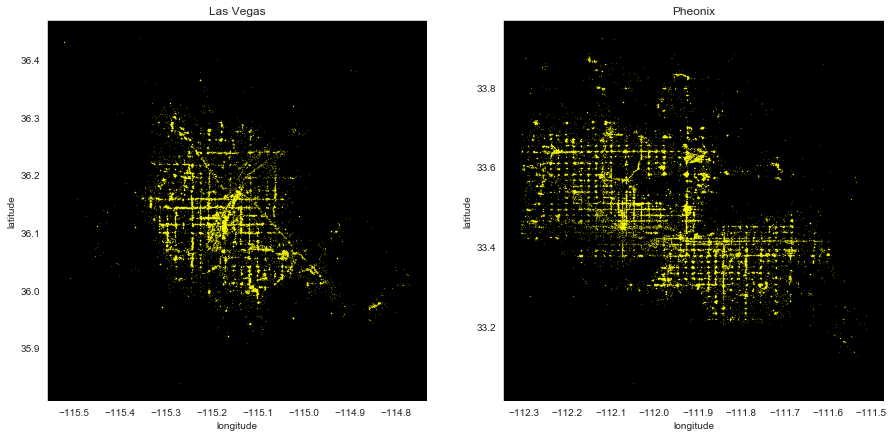

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')

#a random point inside pheonix
lat = 33.435463
lon = -112.006989
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Pheonix")
ax2.set_facecolor('black')
f.show()

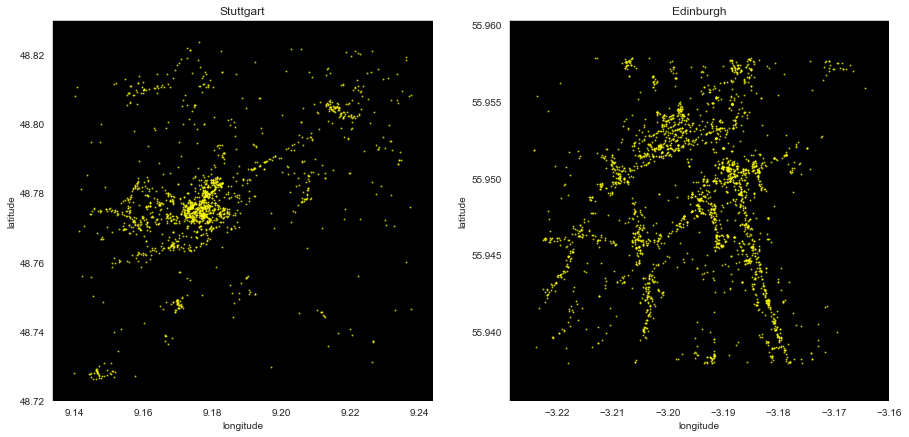

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#a random point inside Stuttgart 
lat = 48.7757200
lon = 9.187950
#some adjustments to get the right pic
lon_min, lon_max = lon-0.05,lon+0.05
lat_min, lat_max = lat-0.05,lat+0.05
#subset for stuttgart
ratings_data_stuttgart=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_stuttgart.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Stuttgart")
ax1.set_facecolor('black')
#a random point inside edinburgh
lat = 55.947871
lon = -3.194255
#some adjustments to get the right pic
lon_min, lon_max = lon-0.03,lon+0.03
lat_min, lat_max = lat-0.01,lat+0.01
#subset for pheonix
ratings_data_edinburgh=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh")
ax2.set_facecolor('black')
f.show()

Interesting observation here is the Blocks or grid structure of the US cities VS the bit fluid design of the other cities.
It is a bit awesome that we can bring out such detail with just locations of Businesses.

## 4.4 Ratings in Vegas:
Lets take a view of how people rated different businesses in Vegas.

The following is an interactive Animation, where we use the awesome Folium package to create stunning Leaflet map visuals.

Here, in this animation, we are showing the highlighting businesses based on their Star ratings.

The intention was to see if there are certain hotspots/concentrations where there are awesome Restaurants.

It turns out good and bad businesses are peppered around the city quite evenly.

In [16]:
data=[]
#rearranging data to suit the format needed for folium
stars_list=list(rating_data['stars'].unique())
for star in stars_list:
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
#initialize at vegas
lat = 36.127430
lon = -115.138460
zoom_start=11
print("                     Vegas Review heatmap Animation ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)
#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
hm.add_to(m)
m

                     Vegas Review heatmap Animation 


In [17]:
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 1024.5879232883453 s


The buttons don't load properly. But you can click the play/loop button to see the various businesses based on their star ratings.

# 5. Reviews Deep dive:

Lets look at the top users based on the number of reviews they have given.

In [18]:
user_agg=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [19]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date             useful  funny   cool  \
                           count         min         max    sum    sum    sum   
user_id                                                                         
CxDOIDnH8gp9KXzpBHJYXw      3569  2009-11-09  2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077  2012-05-20  2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611  2008-12-12  2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463  2006-02-12  2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322  2007-03-20  2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184  2010-12-27  2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159  2011-04-10  2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126  2009-06-12  2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117  2009-03-08  2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101  2008-05-13  2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

The reviews might be random sampled data out of all the reviews as, the top user according to the "Users" dataframe is a different person!

## 5.2 Stalking the top user:
Anyways lets stalk the top user from the reviews dataset

We do this by creating a map of all the places he has reviewed in the chronological order and then create a heat map animation out of it.

In [20]:
#Stalking the top user:
top_user_reviews=reviews[reviews['user_id']=='CxDOIDnH8gp9KXzpBHJYXw']
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,business,on='business_id')
# UNique list of dates from the user's reviews
date_list=list(top_user_locs['date'].unique())
#rearranging data to suit the format needed for folium
data=[]
for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date']]
    data.append(subset[['latitude','longitude']].values.tolist())

In [21]:
#initialize at ontario,Canada (the location our top user is from)
lat = 43.860397
lon = -79.303184
zoom_start=9
print("                     Stalking the top User    ")
# basic map
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True)
hm.add_to(m)
m

                     Stalking the top User    


Enough stalking for now. Let's look into some summary stats for Users.
## 5.3 User summary stats:

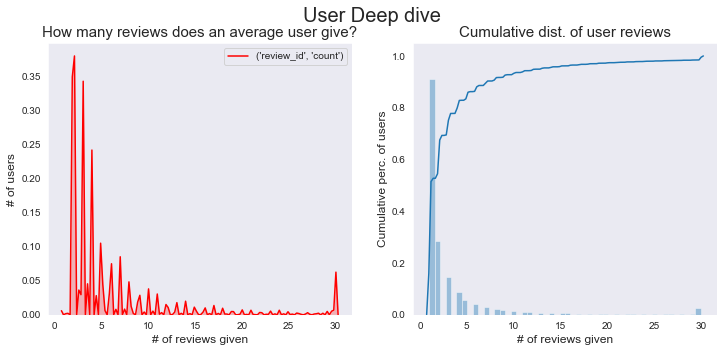

Took 1938.3870975971222 s


In [22]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 5 reviews!

In [23]:
gc.collect()
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 1938.5120661258698 s


# 6.Check ins! 
This is a dataset of where people have made a check-in and at what time.


In [24]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [25]:
#checkins exploration
df=check_in.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
#highlight the max of each column
df.style.apply(highlight_max, color='darkorange', axis=0)

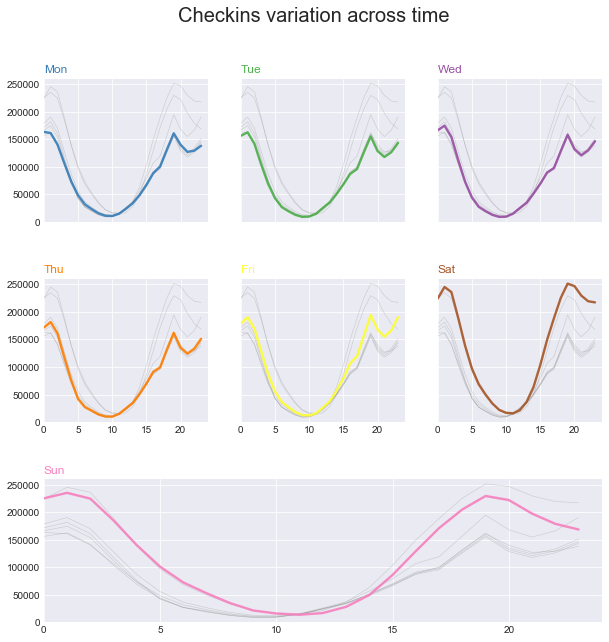

In [26]:
#https://python-graph-gallery.com/125-small-multiples-for-line-chart/  -- this is a goldmine
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the lineplot
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0,24)
    plt.ylim(-2,260000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

# 7. User-networks:

Users table contains a list of users and their friends. Let's try to make a network out of this!

If you guys know better ways of using networks, do let me know in the comments below. Always happy to learn from the community :)

## 7.1 Global graph:

lets try to create our own network from the list of friends and users

In [27]:
# # There might be a better more efficient way of doing this! If you do know, plz let me know in the comments!
# #Scaling to all the users
# #network_data=pd.DataFrame(columns=['friends','user_id'])
# for i in range(0,subset_users.shape[0]):
#     #make the friend list
#     friend_list=list(subset_users.iloc[i].friends.split(','))
#     #Convert the friends list into a column
#     friend_frame=pd.DataFrame(friend_list,columns=['friends'])
#     # Broadcasting the user-id column with the friends col
#     friend_frame['user_id']=subset_users.iloc[i].user_id
#     if i==2000:
#         #Stopping at 2k due to time contraints,remove this section to see all connections
#         break
#     if i==0:
#         network_data=friend_frame
#     else:
#         network_data=network_data.append(friend_frame)

In [28]:
## More efficient way of doing the same transformations in the above cell
#subset users who have atleast one friend
subset_users=user[user['friends']!='None']
#user has given atleast 10 reviews
subset_users=subset_users[subset_users['review_count']>=10]
#subset_users=subset_users.sort_values('review_count',ascending=False)

subset_users['list_friends']=subset_users["friends"].apply(lambda x: str(x).split(','))

subset_users=subset_users[['user_id','list_friends']]
#stopping at 6k due to space constraints
subset_users=subset_users.iloc[0:6000]
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()


In [29]:
network_data=res.reset_index()
#checks
network_data.tail()

user_id  level_1                        0
680008  2u25cspHvOE_ohZpxnRUJw       63   BNH9Lf6Uje18SyCCauPFpg
680009  2u25cspHvOE_ohZpxnRUJw       64   8RK3i_X7zqMgAgpzGfgmTQ
680010  2u25cspHvOE_ohZpxnRUJw       65   BK13W9SMlTvXoY-VW5l2Gg
680011  2u25cspHvOE_ohZpxnRUJw       66   SwoOYtJP2noNE0DQ9wZ-tA
680012  2u25cspHvOE_ohZpxnRUJw       67   0YY0RE_FewOF9_JN_r9vLA

In [30]:
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data)
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 2120.090104818344 s


In [31]:
#credits https://www.kaggle.com/crailtap/basic-network-analysis-tutorial
#basic info
print(nx.info(graph))
#check density
print("The density of the graph is ",nx.density(graph))
# we get a very sparse(not dense) graph. Maybe if we used all the nodes then we might get a more dense graph
#too big to draw!
# nx.draw(graph, pos=nx.spring_layout(graph))

Name: 
Type: Graph
Number of nodes: 502215
Number of edges: 680010
Average degree:   2.7080
The density of the graph is  5.392210029748853e-06


## 7.2 Graph subset - Stuttgart region:

I could not load the entire user-friend list into memory without crashing the kernel.

Hence, taking users of a single city for this EDA. Choosing "Stuttgart" because the size of the user-base is manageable.


In [32]:
#lets take a single town's population and make a graph out of those users
# since we dont have people and location together
# Mapping businesses of a location to reviews and then to users and then finding their friends network

subset=business[business.city=='Stuttgart']
subset=pd.merge(subset,reviews,how='inner',on='business_id')
subset_users=subset.user_id.unique()

subset_users=pd.DataFrame(subset_users,columns=['user_id'])
subset_users=pd.merge(subset_users,user,how='inner',on='user_id')

# create friend list
subset_users['list_friends']=subset_users["friends"].apply(lambda x: str(x).split(','))
subset_users['count_friends']=subset_users["list_friends"].apply(lambda x: len(x))

#check
subset_users.shape

(8828, 24)

In [33]:
subset_users_list=subset_users[['user_id','list_friends']]
network_data = subset_users_list.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()
network_data=network_data.reset_index()
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

In [34]:
# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data)
# logging time
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 4680.6153519153595 s


In [35]:
#basic info
print(nx.info(graph))
#check density
print("The density of the graph is ",nx.density(graph))

Name: 
Type: Graph
Number of nodes: 76201
Number of edges: 100255
Average degree:   2.6313
The density of the graph is  3.453189366801388e-05


In [36]:
#use degree-centrality to find out influencers in the selected region
x=nx.degree_centrality(graph)
#Creating a subset again as we cant handle 70k nodes, unfortunately.

#Using heapq to find the 2000 most connected nodes (ie) peeple with the most connections
influencers=heapq.nlargest(2000, x, key=x.get)

In [37]:
#creating a sub-graph as I'm not able to create the layout positions without killing the kernal
influencers_sub_graph=graph.subgraph(influencers)

# Check for isolates ( nodes with no edges (ie) users without friends in the sub-graph)
# graph=graph.remove_nodes_from(nx.isolates(graph))
list_of_nodes_to_be_removed=[x for x in nx.isolates(influencers_sub_graph)]

# remove the selected isolates from the main graph
graph.remove_nodes_from(list_of_nodes_to_be_removed)

In [38]:
#recreate the subgraph from the updated graph
influencers_sub_graph=graph.subgraph(influencers)

In [39]:
#basic info
print(nx.info(influencers_sub_graph))
#check density
print("The density of the graph is ",nx.density(influencers_sub_graph))

Name: 
Type: Graph
Number of nodes: 1711
Number of edges: 13601
Average degree:  15.8983
The density of the graph is  0.009297254435523837


# 8 Graph Visuals:
Now that we have made the graph subset that will fit into memory, let's try to visualize it.

## 8.1 Spring layout

In [40]:
# create the layout
pos = nx.spring_layout(influencers_sub_graph)

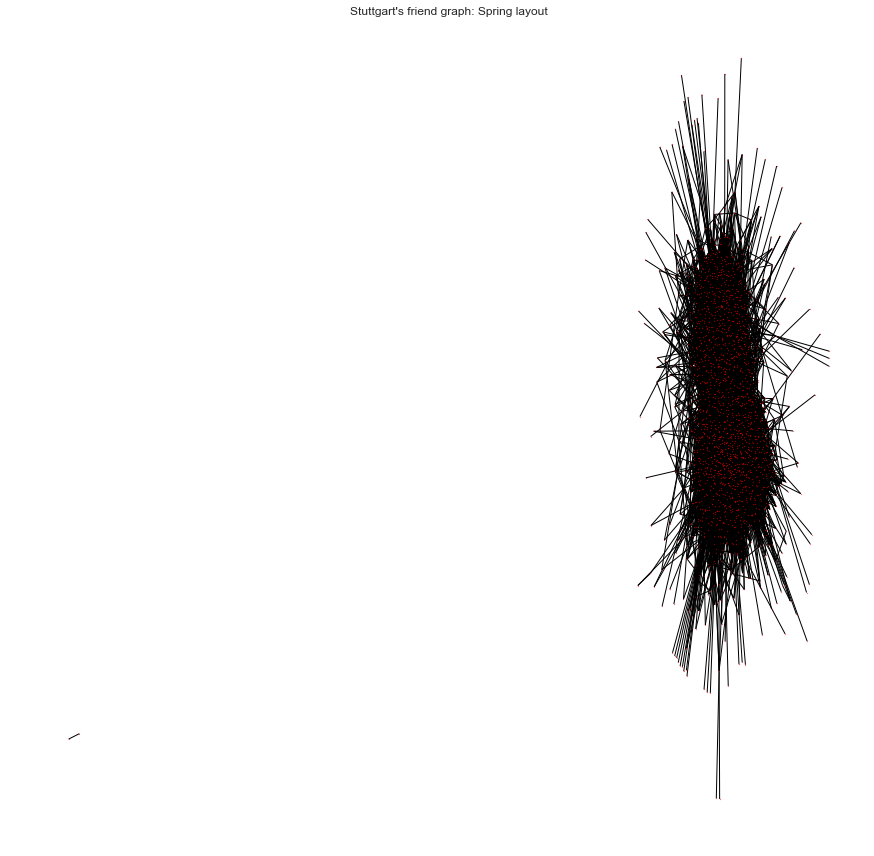

In [41]:
plt.figure(figsize=(15,15))
plt.title("Stuttgart's friend graph: Spring layout")
nx.draw(influencers_sub_graph, pos=pos, node_size=0.05, width=1)

The above graph structure shows the user-base of Stuttgart with their connections.

Lets explore other views that are possible with networkx
## 8.2 Circluar/circos layout:


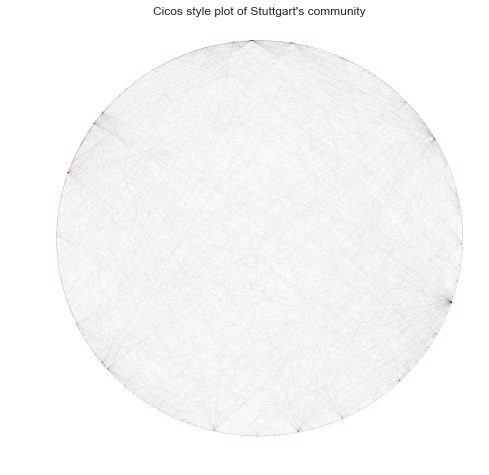

In [42]:
plt.figure(figsize=(8,8))
plt.title("Cicos style plot of Stuttgart's community")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_circular(influencers_sub_graph,node_size=0.001, width=0.001)

## 8.3 Random layout:

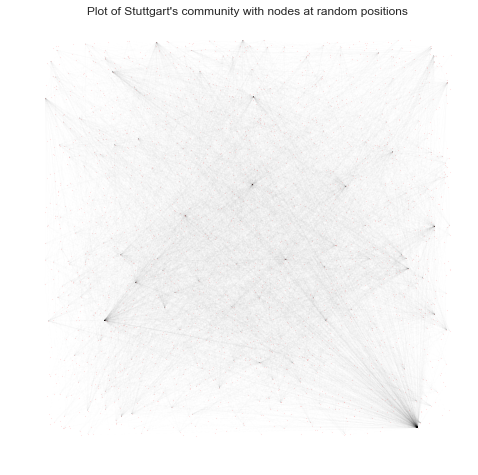

In [43]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community with nodes at random positions")
#https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
nx.draw_random(influencers_sub_graph,node_size=0.001, width=0.001)

## 8.4 Kamada Kawai layout:

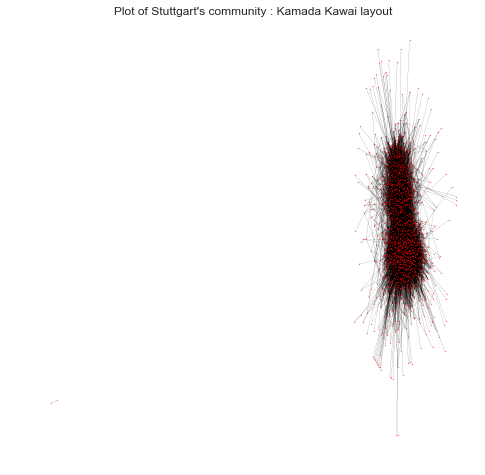

In [44]:
plt.figure(figsize=(8,8))
plt.title("Plot of Stuttgart's community : Kamada Kawai layout")
pos2=nx.kamada_kawai_layout(influencers_sub_graph)
nx.draw(influencers_sub_graph, pos=pos, node_size=0.05, width=0.1)

So many beautiful plots worth hanging in a modern art museum :P

Now, let's try to use them for something.

# 9. Community detection:

In this section,

* I try to find out the underlying community of Stuttgart's influencers 
* Overlay the detected communities on the spring layout of the graph
* Find out the critical links (or) highly influential people with the community

In [45]:
#community detection -- Done in 3 lines :p
import community
parts = community.best_partition(influencers_sub_graph)
values = [parts.get(node) for node in influencers_sub_graph.nodes()]

print(len(set(values))," Communities have been identified")

9  Communities have been identified


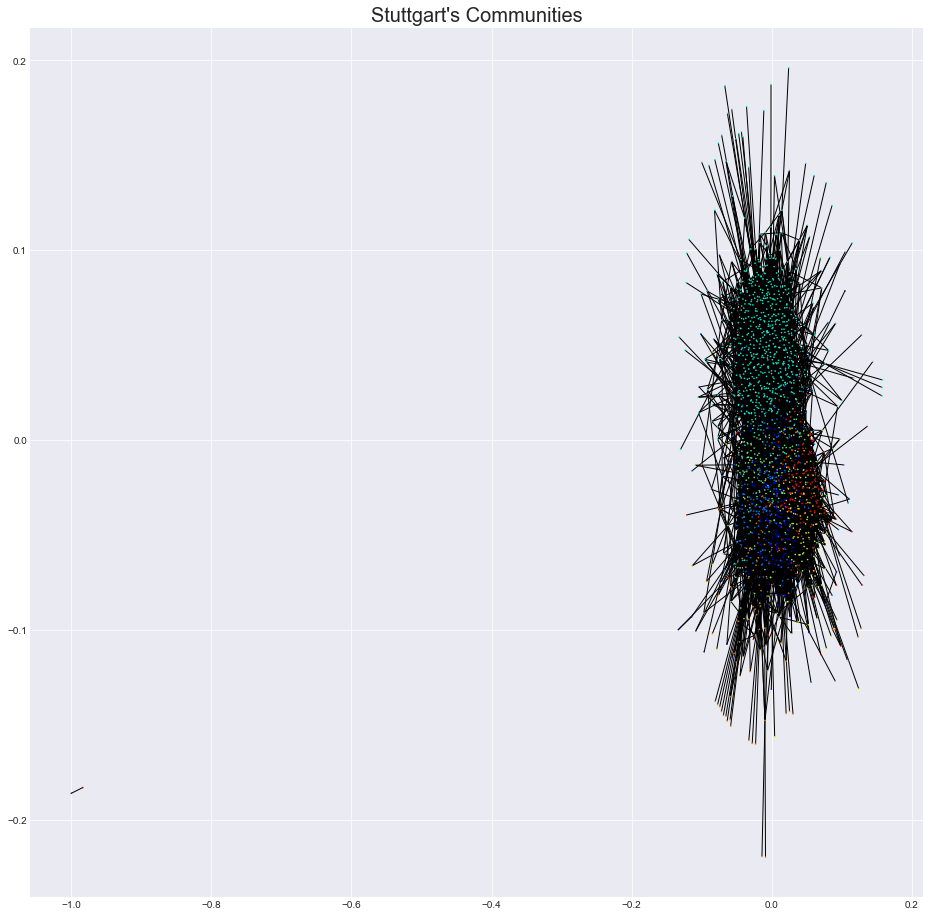

In [46]:
plt.figure(figsize=(16,16))
plt.axes=False
plt.title("Stuttgart's Communities",fontsize=20)
nx.draw_networkx(influencers_sub_graph, pos = pos,cmap = plt.get_cmap("jet"), node_color = values, node_size = 0.3, with_labels = False,scale=2)

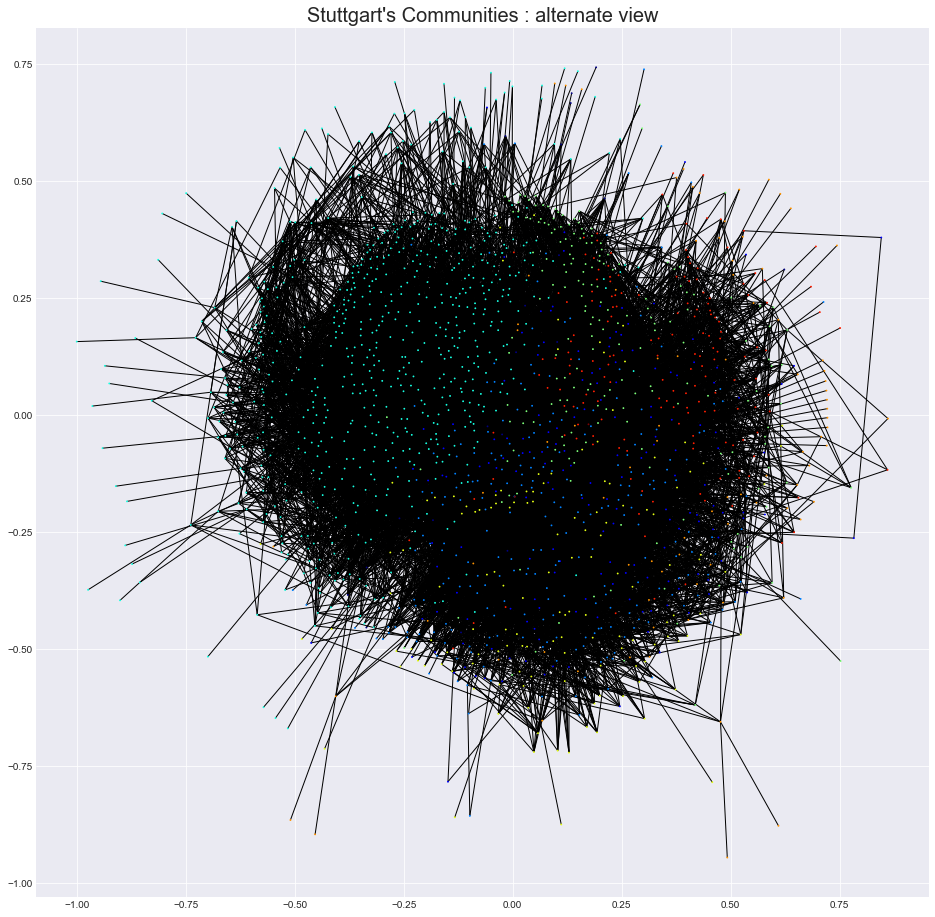

In [47]:
plt.figure(figsize=(16,16))
plt.axes=False
plt.title("Stuttgart's Communities : alternate view",fontsize=20)
nx.draw_networkx(influencers_sub_graph, pos = pos2,cmap = plt.get_cmap("jet"), node_color = values, node_size = 0.7, with_labels = False,scale=2)